In [117]:
## Import All the librabries

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from  keras.layers import Dense , LSTM



In [12]:
#GET the stock 
df = pdr.DataReader('AAPL' , data_source='yahoo' , start = '2010-01-01' , end = '2021-11-16')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459940
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998
...,...,...,...,...,...,...
2021-11-10,150.130005,147.850006,150.020004,147.919998,65187100.0,147.919998
2021-11-11,149.429993,147.679993,148.960007,147.869995,41000000.0,147.869995
2021-11-12,150.399994,147.479996,148.429993,149.990005,63632600.0,149.990005


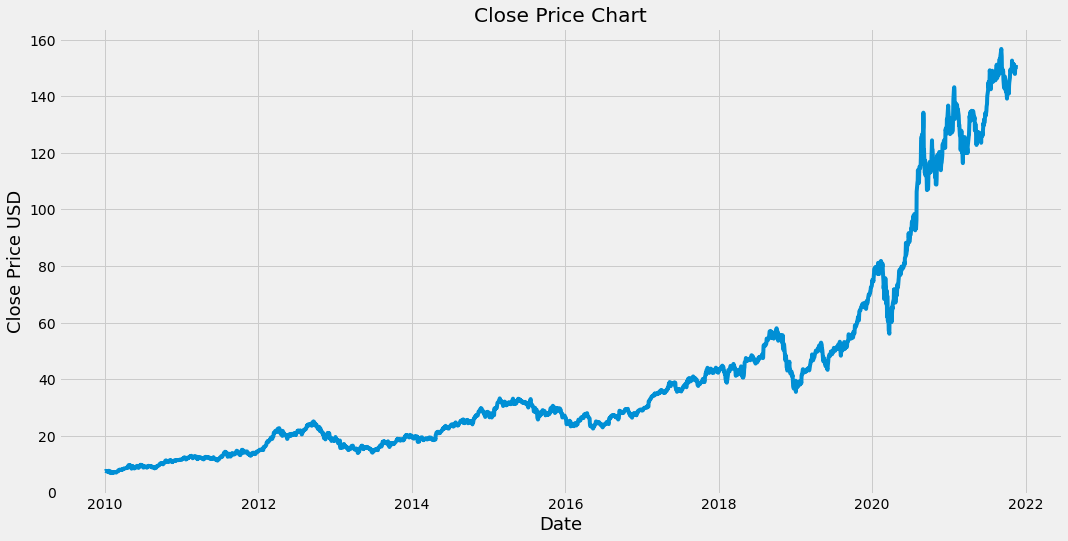

In [13]:
#plot the graph of closing price
plt.figure(figsize=(16,8))
plt.title('Close Price Chart')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.show()


In [14]:
#create new dataset with closing price 
data = df.filter(['Close'])
#Convert data in numpy array
dataset = data.values
#trainning data set i.e 80%
training_data_len = math.ceil(len(dataset)* 0.8 )

training_data_len


2393

In [15]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00445263],
       [0.00523446],
       [0.00532266],
       ...,
       [0.95528299],
       [0.9553497 ],
       [0.96202388]])

In [16]:
#create training data set i.e scaled one
train_data = scaled_data[0:training_data_len , :]

In [17]:
#split data in x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i , 0])
    y_train.append(train_data[i , 0])

In [20]:
#convert x_train & y_train in numpy array
x_train , y_train = np.array(x_train) , np.array(y_train)

In [24]:
#reshape in data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2333, 60, 1)

In [28]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [29]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [30]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

2333/2333 [==============================] - 41s 17ms/step - loss: 1.9589e-04


In [31]:
#create testing data sets
test_data = scaled_data[training_data_len - 60: , :]
#create data set x_test & y_test
x_test=[]
y_test=dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [32]:
#convert to numpy array
x_test = np.array(x_test)

In [33]:
#reshape the data (data is 2D and LSTM expect 3D model)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [34]:
#get the predicted values from model
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [35]:
#elavaltion of model by RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.536900855227059

<ipython-input-37-57ca3af0a909>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


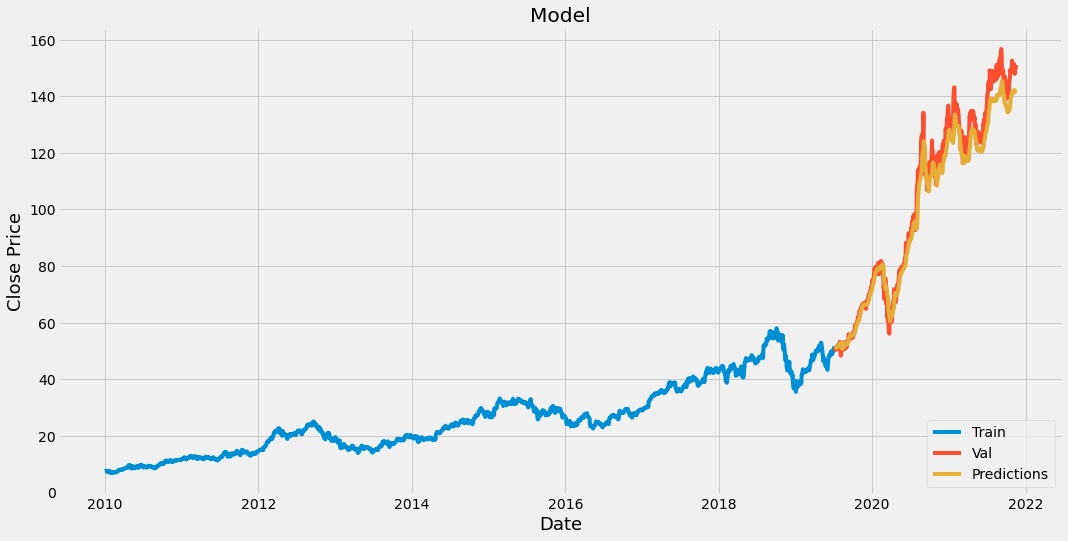

In [37]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#visualize the data 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
#show the actual and predicted prices
valid

,Close,Predictions
Date,,
2019-07-08,50.005001,50.831123
2019-07-09,50.310001,50.906204
2019-07-10,50.807499,50.930336
2019-07-11,50.437500,50.986168
2019-07-12,50.825001,51.002995
...,...,...
2021-11-10,147.919998,142.146744
2021-11-11,147.869995,141.741043
2021-11-12,149.990005,141.222290


In [39]:
#get the predictions
apple_predict = pdr.DataReader('AAPL',data_source='yahoo',start = '2010-01-01' , end = '2021-11-16')
#create new data frame
new_df = apple_predict.filter(['Close'])
#get data of last 60 days closing day prices
last_60_days = new_df[-60:].values
#Scale data between values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)
#create empty list
X_test=[]
#append last 60 days
X_test.append(last_60_days_scaled)
#convert X-test to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0] , X_test.shape[1] , 1))
#get predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

#this price is for 17th November

[[141.10852]]


In [40]:
#checking the price
apple_predict2 = pdr.DataReader('AAPL',data_source='yahoo',start = '2021-11-17' , end = '2021-11-17')
print(apple_predict2['Close'])

Date
2021-11-16    151.000000
2021-11-17    153.490005
Name: Close, dtype: float64
